# Dataset link: https://www.kaggle.com/datasets/satvicoder/call-center-data

# **Step 1: Install and Import Libraries**

In [1]:
# Install necessary libraries (if not already installed)
!pip install tensorflow matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import networkx as nx

# **Step 2: Load Dataset from Google Drive**

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/file name.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview:
   Index  Incoming Calls  Answered Calls Answer Rate  Abandoned Calls  \
0      1             217             204      94.01%               13   
1      2             200             182      91.00%               18   
2      3             216             198      91.67%               18   
3      4             155             145      93.55%               10   
4      5              37              37     100.00%                0   

  Answer Speed (AVG) Talk Duration (AVG) Waiting Time (AVG)  \
0           00:00:17            00:02:14           00:02:45   
1           00:00:20            00:02:22           00:06:55   
2           00:00:18            00:02:38           00:03:50   
3           00:00:15            00:02:29           00:03:12   
4           00:00:03            00:02:06           00:00:35   

  Service Level (20 Seconds)  
0    

# **Step 3: Data Preprocessing and Feature Engineering**

In [3]:
# Clean and preprocess data
data = data.drop(columns=['Index'])

# Convert percentage columns to numeric
percentage_cols = ['Answer Rate', 'Service Level (20 Seconds)']
for col in percentage_cols:
    data[col] = data[col].str.rstrip('%').astype(float)

# Convert time columns to seconds
time_cols = ['Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)']
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

for col in time_cols:
    data[col] = data[col].apply(time_to_seconds)

# Add engineered features
data['Abandonment Rate'] = (data['Abandoned Calls'] / data['Incoming Calls']) * 100
data['Average Handling Time'] = data['Talk Duration (AVG)'] + data['Answer Speed (AVG)']

# Define fraud: Abandonment Rate > 20% (example threshold)
data['Fraud'] = (data['Abandonment Rate'] > 20).astype(int)

# Preview the processed dataset
print("\nProcessed Data:")
print(data.head())



Processed Data:
   Incoming Calls  Answered Calls  Answer Rate  Abandoned Calls  \
0             217             204        94.01               13   
1             200             182        91.00               18   
2             216             198        91.67               18   
3             155             145        93.55               10   
4              37              37       100.00                0   

   Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  \
0                  17                  134                 165   
1                  20                  142                 415   
2                  18                  158                 230   
3                  15                  149                 192   
4                   3                  126                  35   

   Service Level (20 Seconds)  Abandonment Rate  Average Handling Time  Fraud  
0                       76.28          5.990783                    151      0  
1                      

# **Heatmap of Feature Correlations**

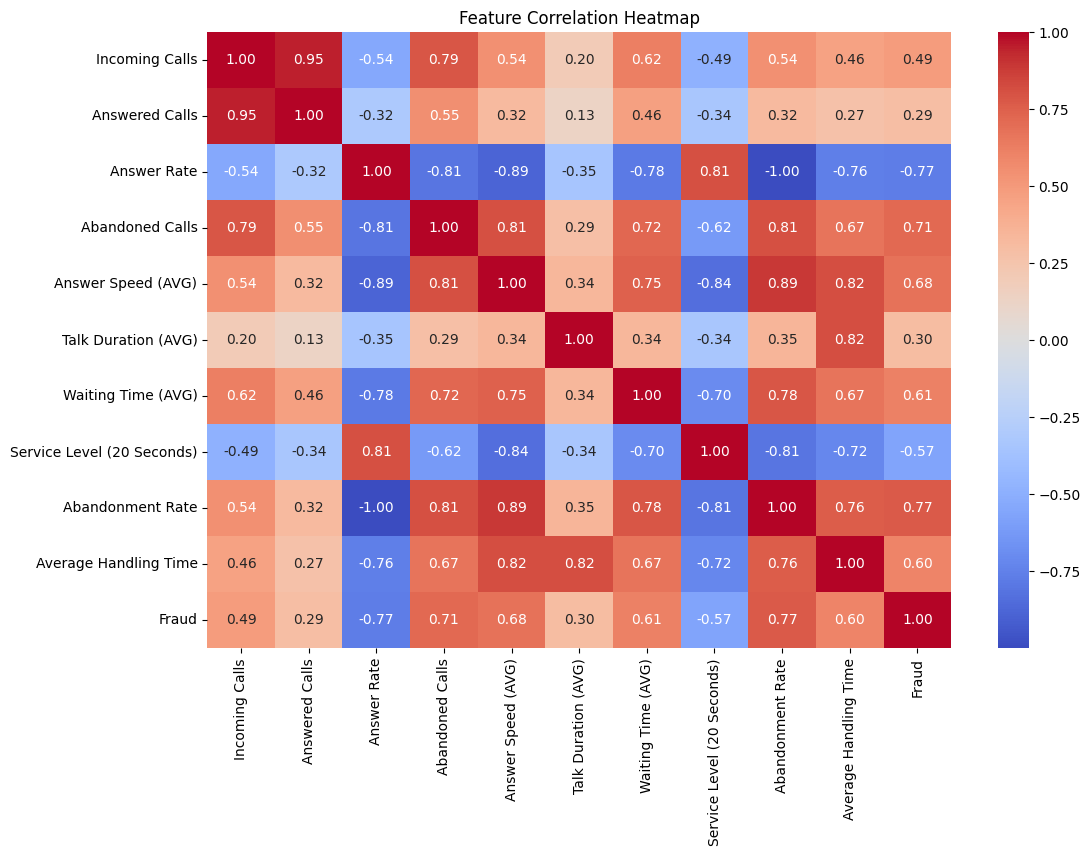

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


# **Step 4: Feature Scaling and Splitting Dataset**

In [5]:
# Features and target
X = data.drop(columns=['Fraud', 'Abandoned Calls', 'Answered Calls'])
y = data['Fraud']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# **Step 5: Build and Train Advanced Deep Learning Model**

In [6]:
# Define a deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("\nTest Accuracy:", test_accuracy)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4137 - loss: 0.7157 - val_accuracy: 0.9314 - val_loss: 0.5895
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9277 - loss: 0.5500 - val_accuracy: 0.9314 - val_loss: 0.4191
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9549 - loss: 0.3844 - val_accuracy: 0.9314 - val_loss: 0.2618
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9491 - loss: 0.2465 - val_accuracy: 0.9486 - val_loss: 0.1724
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9609 - loss: 0.1559 - val_accuracy: 0.9600 - val_loss: 0.1282
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9752 - loss: 0.1350 - val_accuracy: 0.9600 - val_loss: 0.1044
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9632 - loss: 0.1087 - val_accuracy: 0.9714 - val_loss: 0.0868
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9605 - loss: 0.1008 - val_accuracy: 0.9771 - val

# **Step 6: Blockchain Integration**

In [7]:
# Blockchain implementation
class Block:
    def __init__(self, index, data, previous_hash):
        self.index = index
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.compute_hash()

    def compute_hash(self):
        block_string = f"{self.index}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block(0, "Genesis Block", "0")
        self.chain.append(genesis_block)

    def add_block(self, data):
        previous_block = self.chain[-1]
        new_block = Block(len(self.chain), data, previous_block.hash)
        self.chain.append(new_block)

    def is_valid(self):
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i - 1]
            if current.hash != current.compute_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
        return True

# Initialize the blockchain
call_blockchain = Blockchain()

# Add fraudulent call records to the blockchain
fraud_data = data[data['Fraud'] == 1]
for index, row in fraud_data.iterrows():
    call_blockchain.add_block(row.to_dict())

# Check blockchain validity
print("\nBlockchain Valid:", call_blockchain.is_valid())



Blockchain Valid: True


# **Scatter Plot for Fraud Analysis**

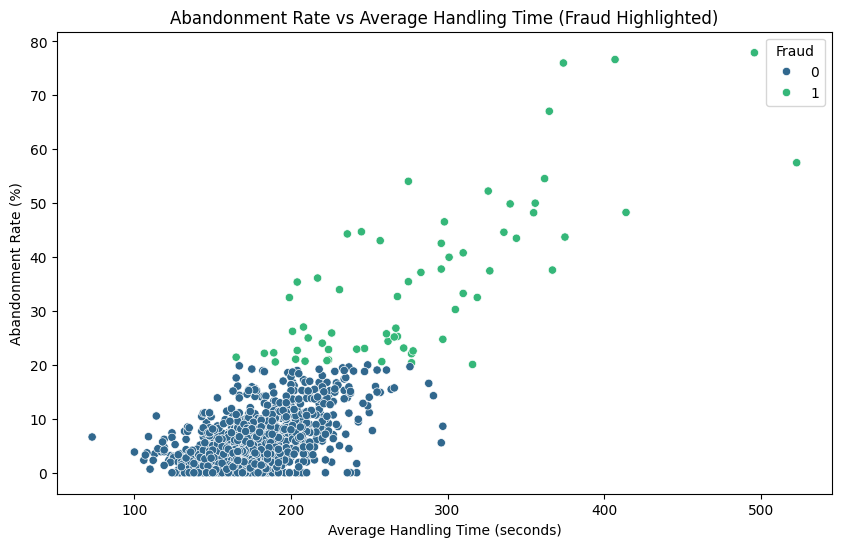

In [8]:
# Scatter Plot: Abandonment Rate vs Average Handling Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Average Handling Time', y='Abandonment Rate', hue='Fraud', palette='viridis')
plt.title('Abandonment Rate vs Average Handling Time (Fraud Highlighted)')
plt.xlabel('Average Handling Time (seconds)')
plt.ylabel('Abandonment Rate (%)')
plt.legend(title='Fraud', loc='upper right')
plt.show()


# **Step 7: Node Tree Visualization for Blockchain**

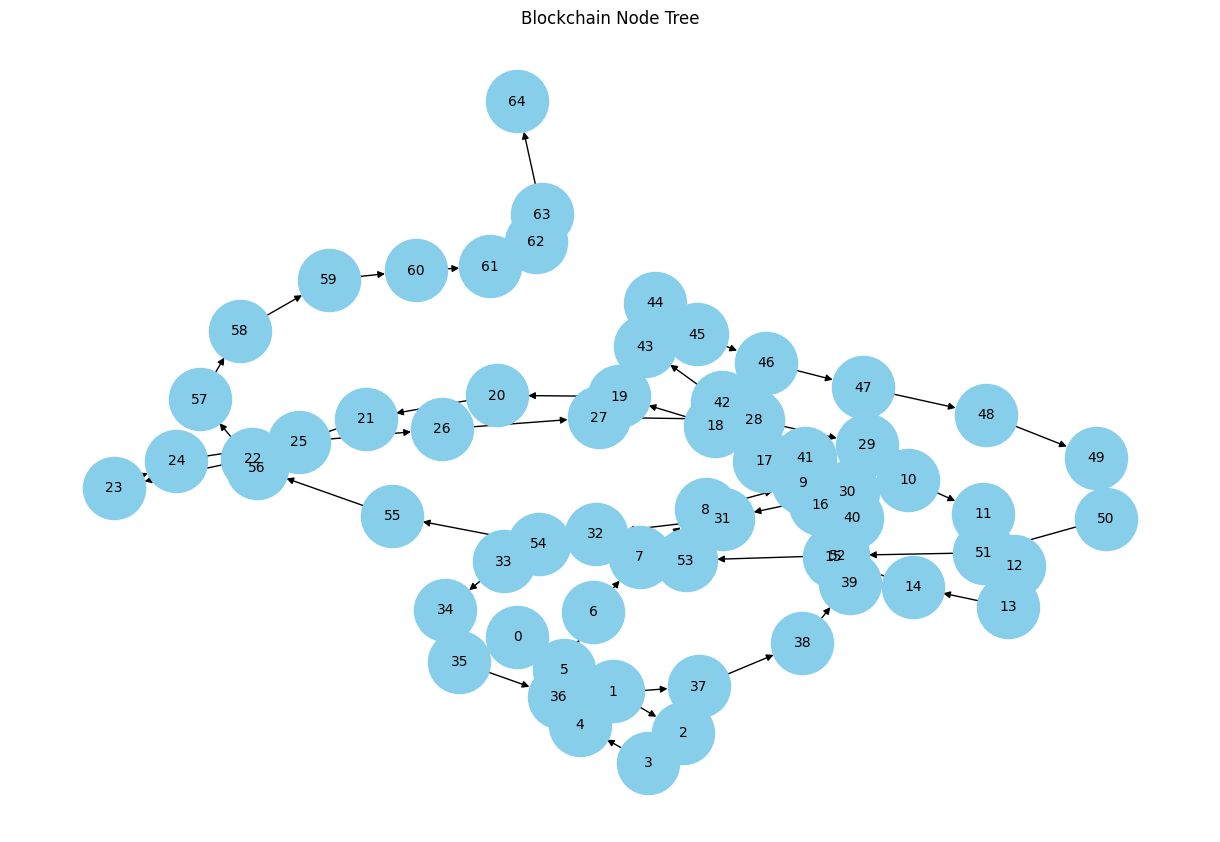

In [9]:
# Visualize blockchain as a node tree
G = nx.DiGraph()
for block in call_blockchain.chain:
    G.add_node(block.index, label=f"Block {block.index}\nHash: {block.hash[:6]}")

for i in range(1, len(call_blockchain.chain)):
    G.add_edge(call_blockchain.chain[i - 1].index, call_blockchain.chain[i].index)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
plt.title('Blockchain Node Tree')
plt.show()


# **Step 8: Advanced Result Analysis and Graphs**

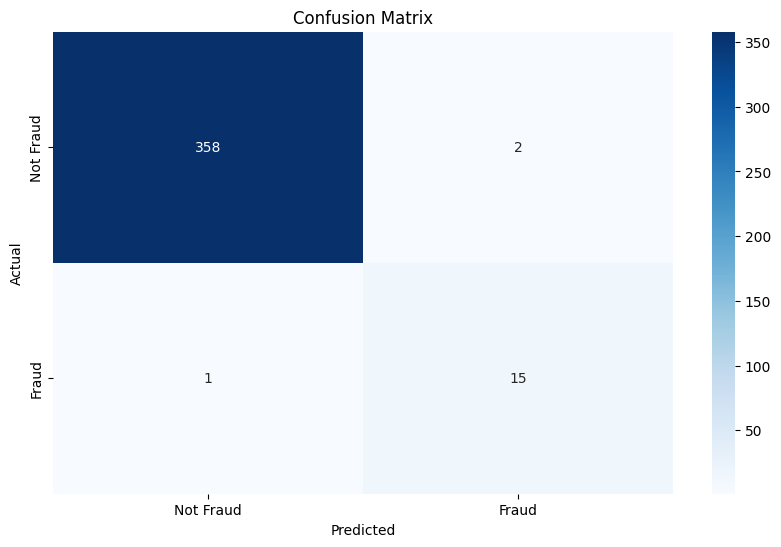

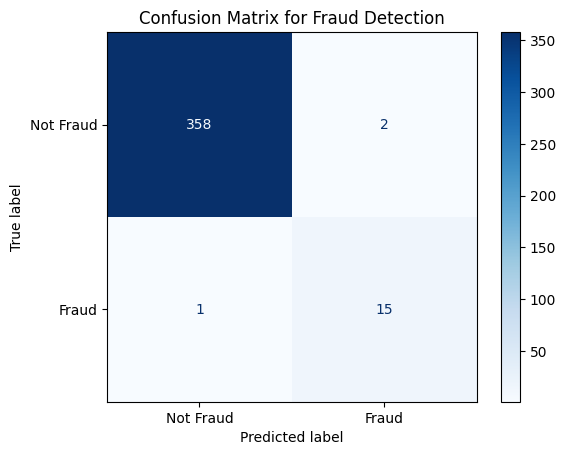

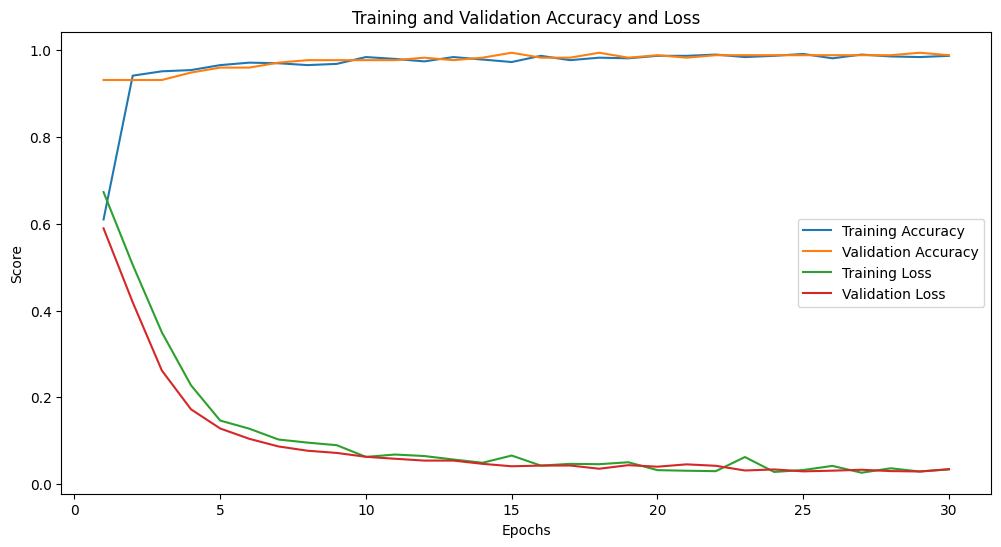

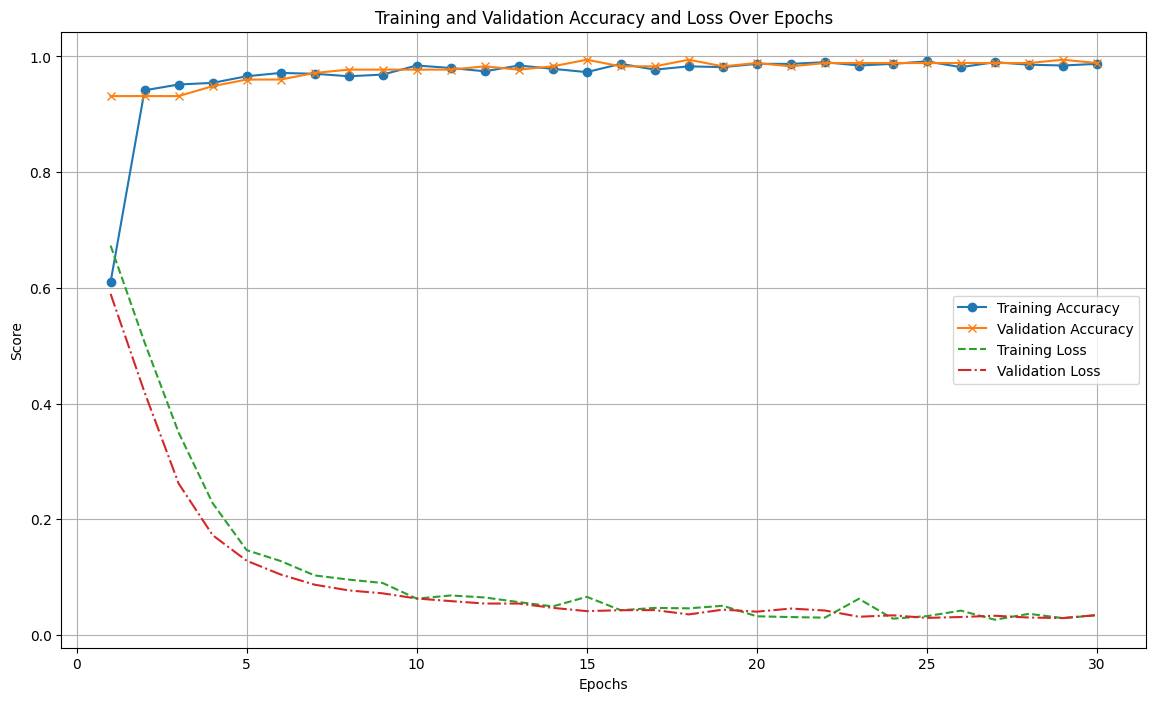

<ipython-input-10-2ce35749b20f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='Average Handling Time', palette='Set2')


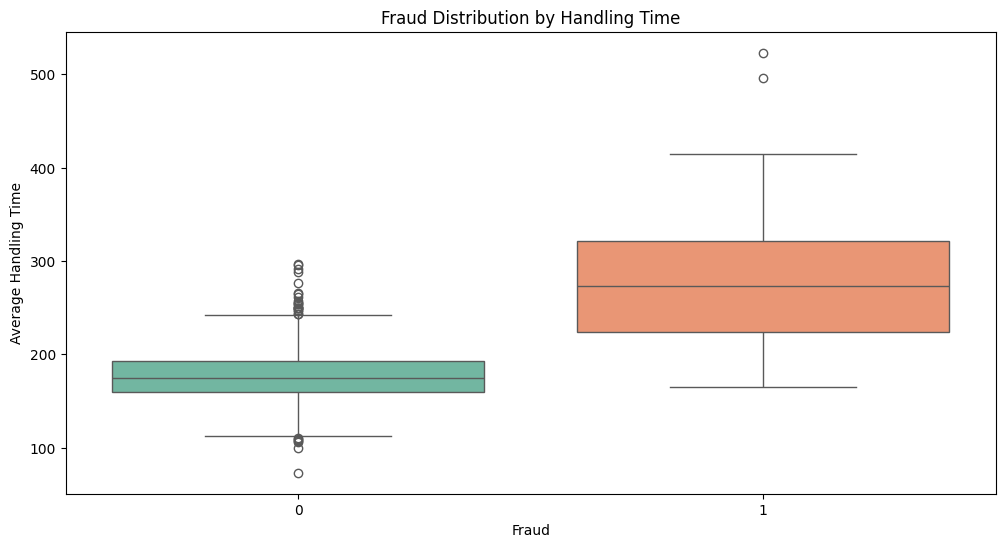

<ipython-input-10-2ce35749b20f>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='Average Handling Time', palette='Set2')


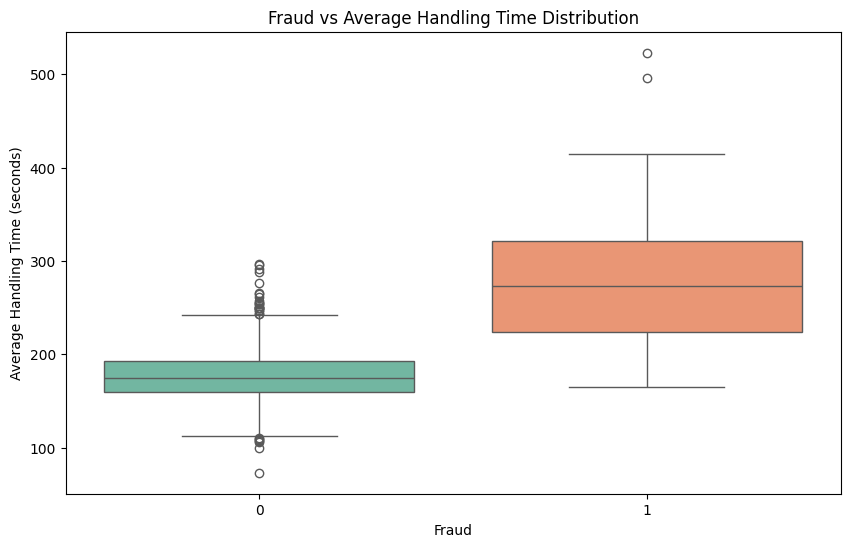

<ipython-input-10-2ce35749b20f>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Fraud', palette='husl')


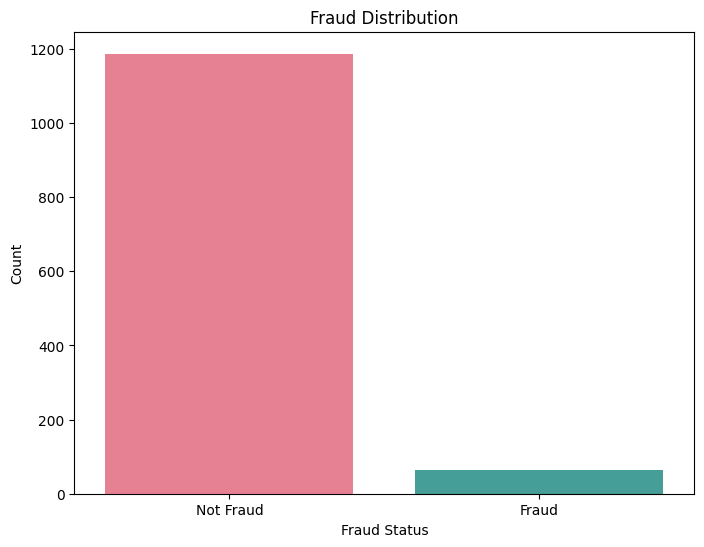

In [10]:
# Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# Confusion Matrix with Heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()

# Training Metrics Plot
# plt.figure(figsize=(12, 6))
# epochs = range(1, len(history.history['accuracy']) + 1)
# plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
# plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(epochs, history.history['loss'], label='Training Loss')
# plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Accuracy and Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Score')
# plt.legend()
# plt.show()

# Training Metrics Plot
plt.figure(figsize=(14, 8))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.plot(epochs, history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', linestyle='-.')
plt.title('Training and Validation Accuracy and Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


# Fraud Distribution by Feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Fraud', y='Average Handling Time', palette='Set2')
plt.title('Fraud Distribution by Handling Time')
plt.show()

# Boxplot: Fraud vs Average Handling Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Fraud', y='Average Handling Time', palette='Set2')
plt.title('Fraud vs Average Handling Time Distribution')
plt.xlabel('Fraud')
plt.ylabel('Average Handling Time (seconds)')
plt.show()

# Countplot: Fraud Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Fraud', palette='husl')
plt.title('Fraud Distribution')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

